<a href="https://colab.research.google.com/github/edwardj4747/Dataset-Labeling/blob/master/ML_notebooks/Aura_MLS_Multi_Label_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No explicit attempt was made to address the problem of some samples being much more commong (ie: ML2O3)

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Load in the data

This is for the broad Threshold case

In [ ]:
# Load in the data
# X = np.load('/content/sample_data/one_hot_5180_features_braod_234_papers.npy')
# X = np.load('/content/sample_data/tfidf_5179_features_braod_234_papers.npy')
# X = np.load('/content/sample_data/doc2vec_broad_234_papers_VS_32_epochs_15.npy')
vector_size=32
y = np.load('/content/sample_data/ML2xx_num_datasets_9_papers_234.npy')

### Corpus sized Doc2Vec

Neural Net did not perform very well using doc2vec trained on only the sentences. See how well it performs using a doc2vec model trained for 100 epochs (45 minutes) on the whole corpus of Aura MLS papers (>200,000 sentences)

In [ ]:
# load in the data
X = np.load('/content/sample_data/doc2vec_ALL_CORPUS_broad_234_papers_VS_32_epochs_100.npy')

In [ ]:
X.shape, y.shape

((234, 32), (234, 9))

In [ ]:
test_percentage = 0.2
test_train_split = int(0.2 * X.shape[0])
test_train_split

46

In [ ]:
X_test = X[:test_train_split, :]
X_train = X[test_train_split:, :]

y_test = y[:test_train_split, :]
y_train = y[test_train_split:, :]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((188, 32), (188, 9), (46, 32), (46, 9))

In [ ]:
model = None
num_hidden_units = 20
second_layer_hidden_units = 9
input = layers.Input(shape=(vector_size,))

x = layers.Dense(num_hidden_units, activation='relu', kernel_regularizer=keras.regularizers.l2())(input)
x = layers.Dense(second_layer_hidden_units, activation='relu', kernel_regularizer=keras.regularizers.l2())(x)
x = layers.Dense(9, activation='sigmoid', kernel_regularizer=keras.regularizers.l2())(x)

model = keras.Model(inputs=input, outputs=[x])

In [ ]:
model.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 32)]              0         
_________________________________________________________________
dense_42 (Dense)             (None, 20)                660       
_________________________________________________________________
dense_43 (Dense)             (None, 9)                 189       
_________________________________________________________________
dense_44 (Dense)             (None, 9)                 90        
Total params: 939
Trainable params: 939
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(),
              metrics = ['accuracy', 'Precision', 'Recall'])

In [ ]:
num_epochs = 50
history = model.fit(X_train, y_train, verbose=0, epochs=num_epochs)

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.5792 - accuracy: 0.4130 - precision: 0.7419 - recall: 0.3538


[0.5792126655578613,
 0.41304346919059753,
 0.7419354915618896,
 0.35384616255760193]

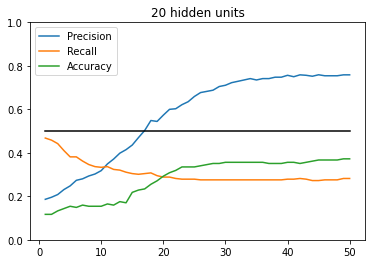

In [ ]:
x_labels = np.arange(num_epochs) + 1
plt.plot(x_labels, history.history['precision'], label='Precision')
plt.plot(x_labels, history.history['recall'], label='Recall')
plt.plot(x_labels, history.history['accuracy'], label='Accuracy')
plt.plot(x_labels, [0.5] * num_epochs, color='black')
plt.ylim((0, 1))
plt.legend()
plt.title(f"{num_hidden_units} hidden units")
plt.show()